# Backpropagation

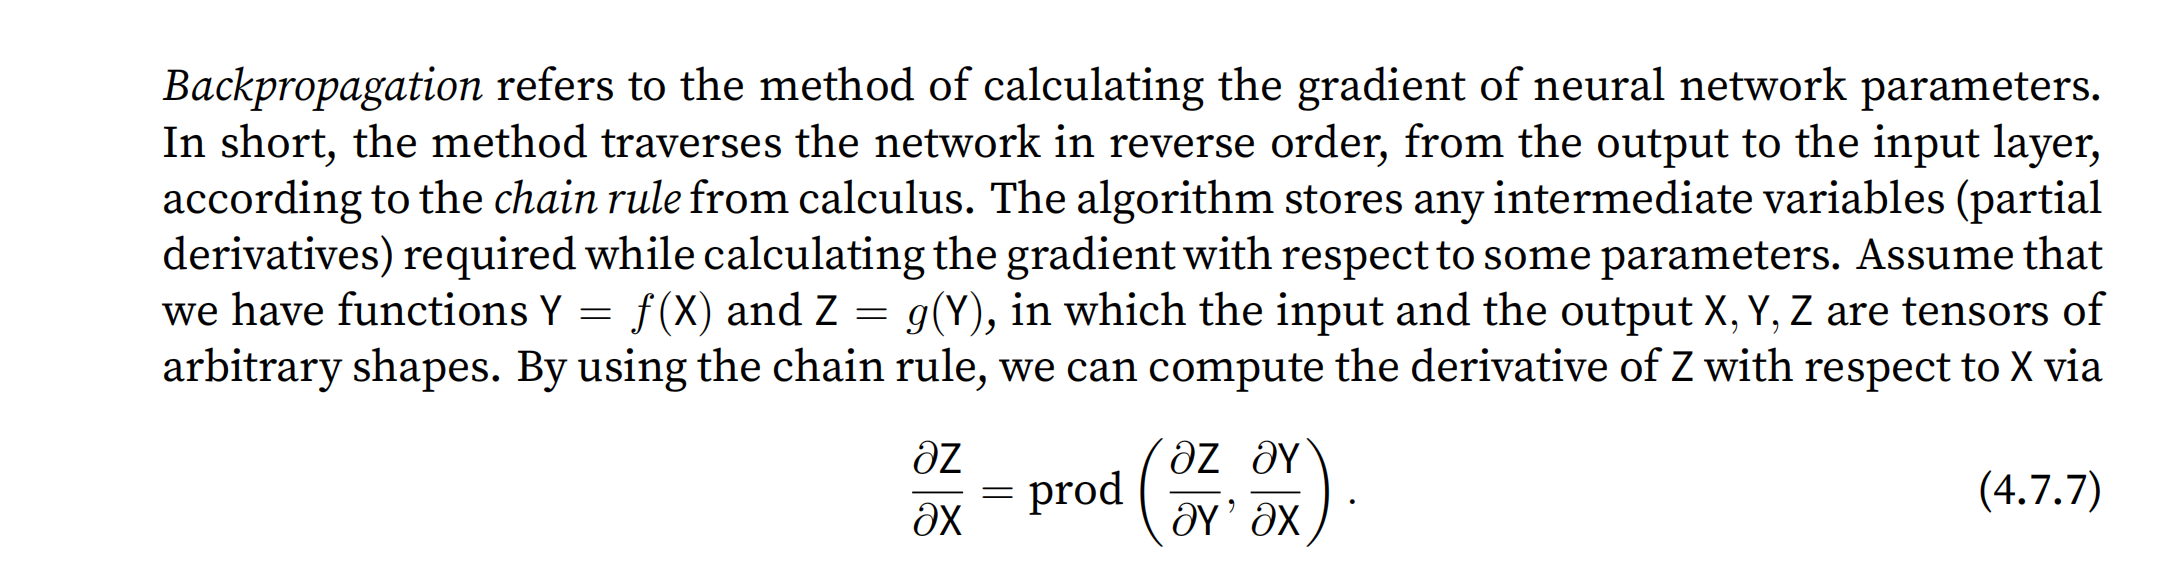

# Training Neural Networks
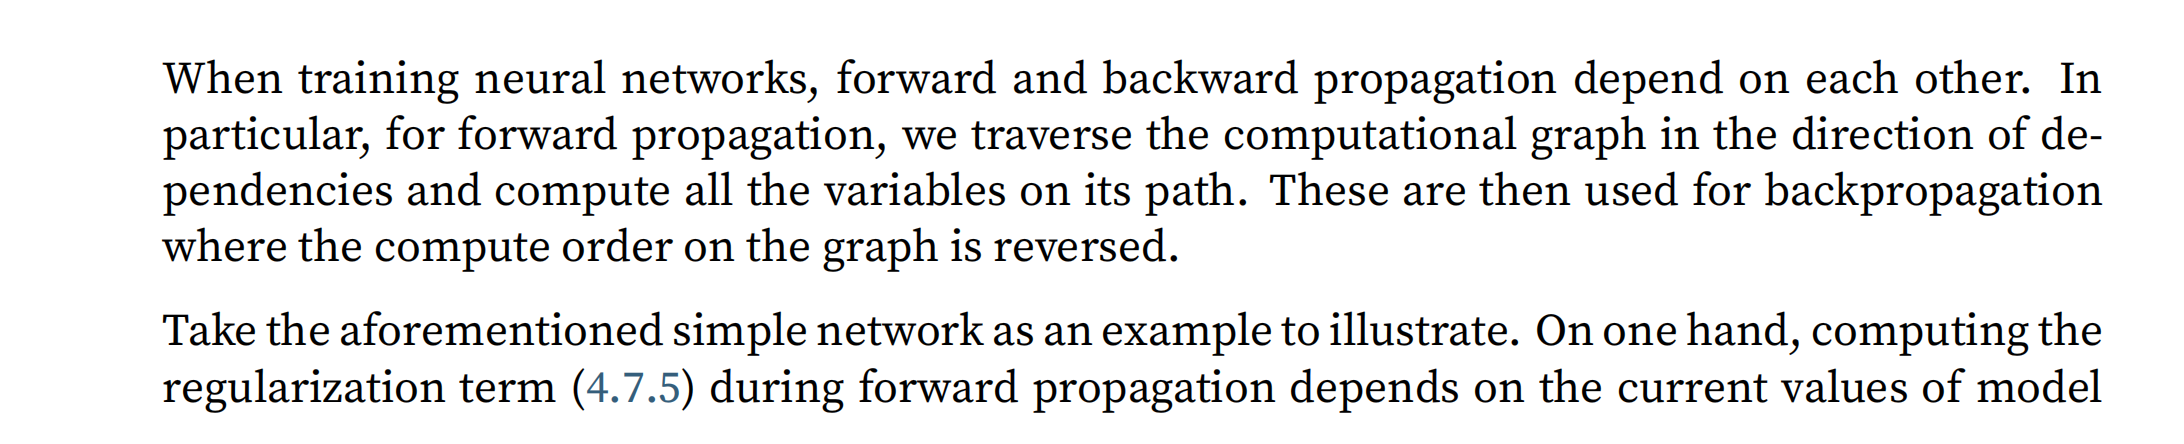


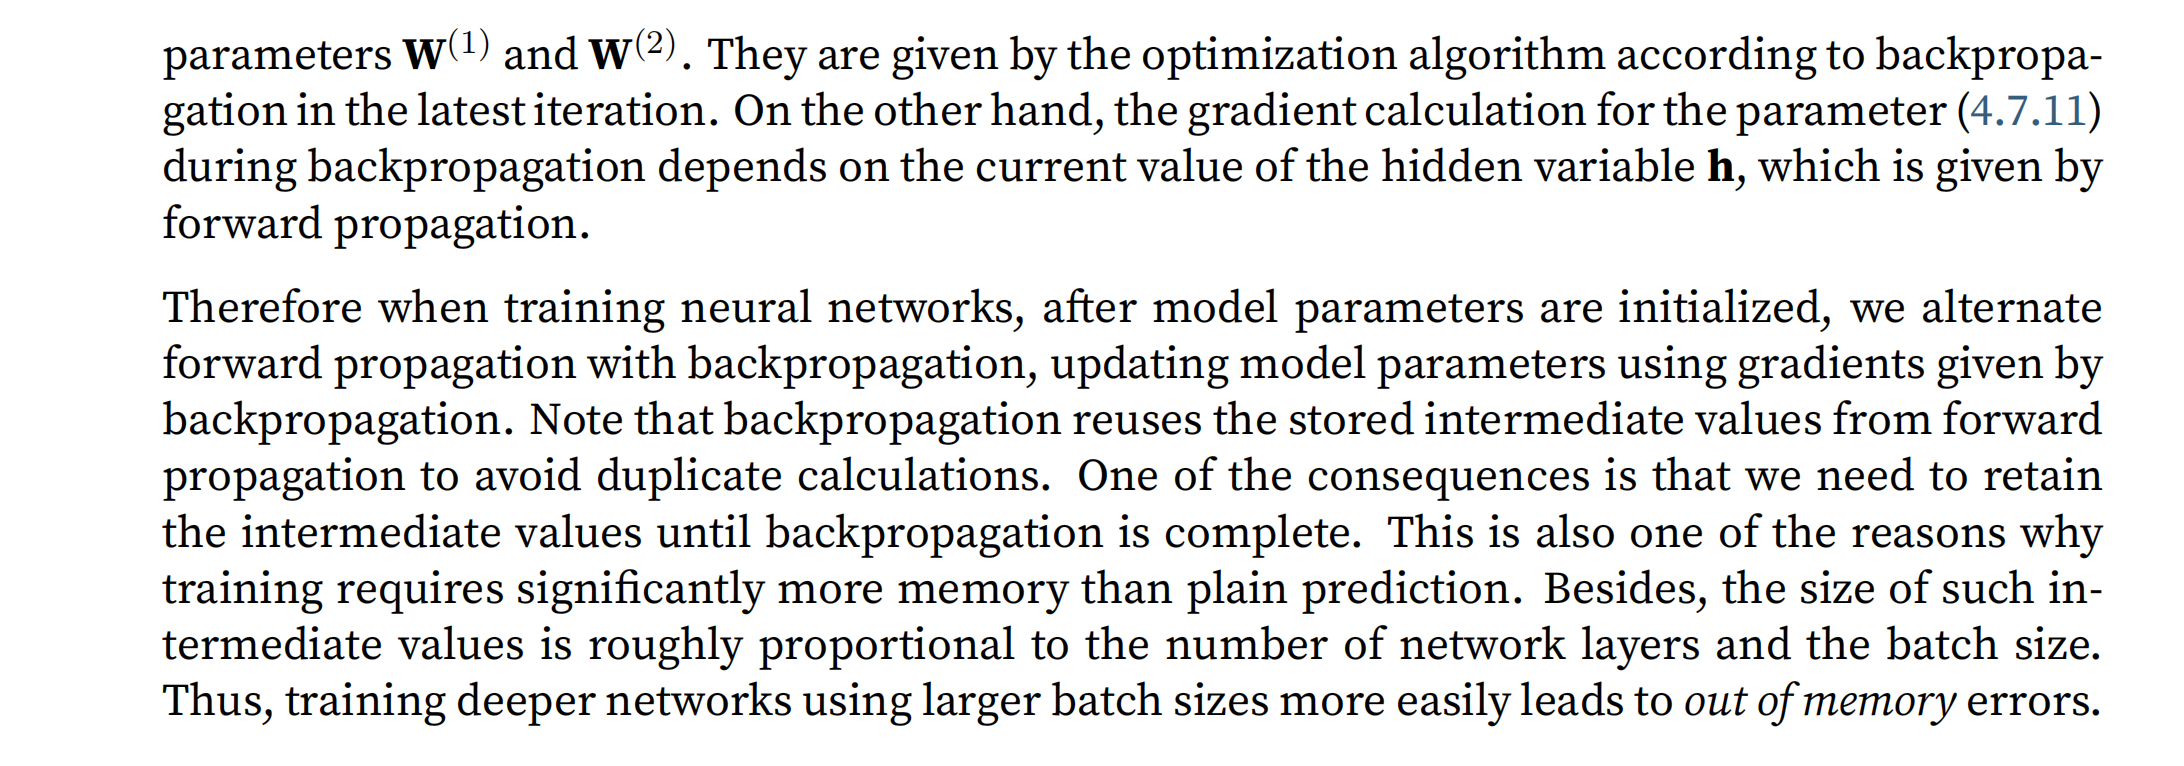

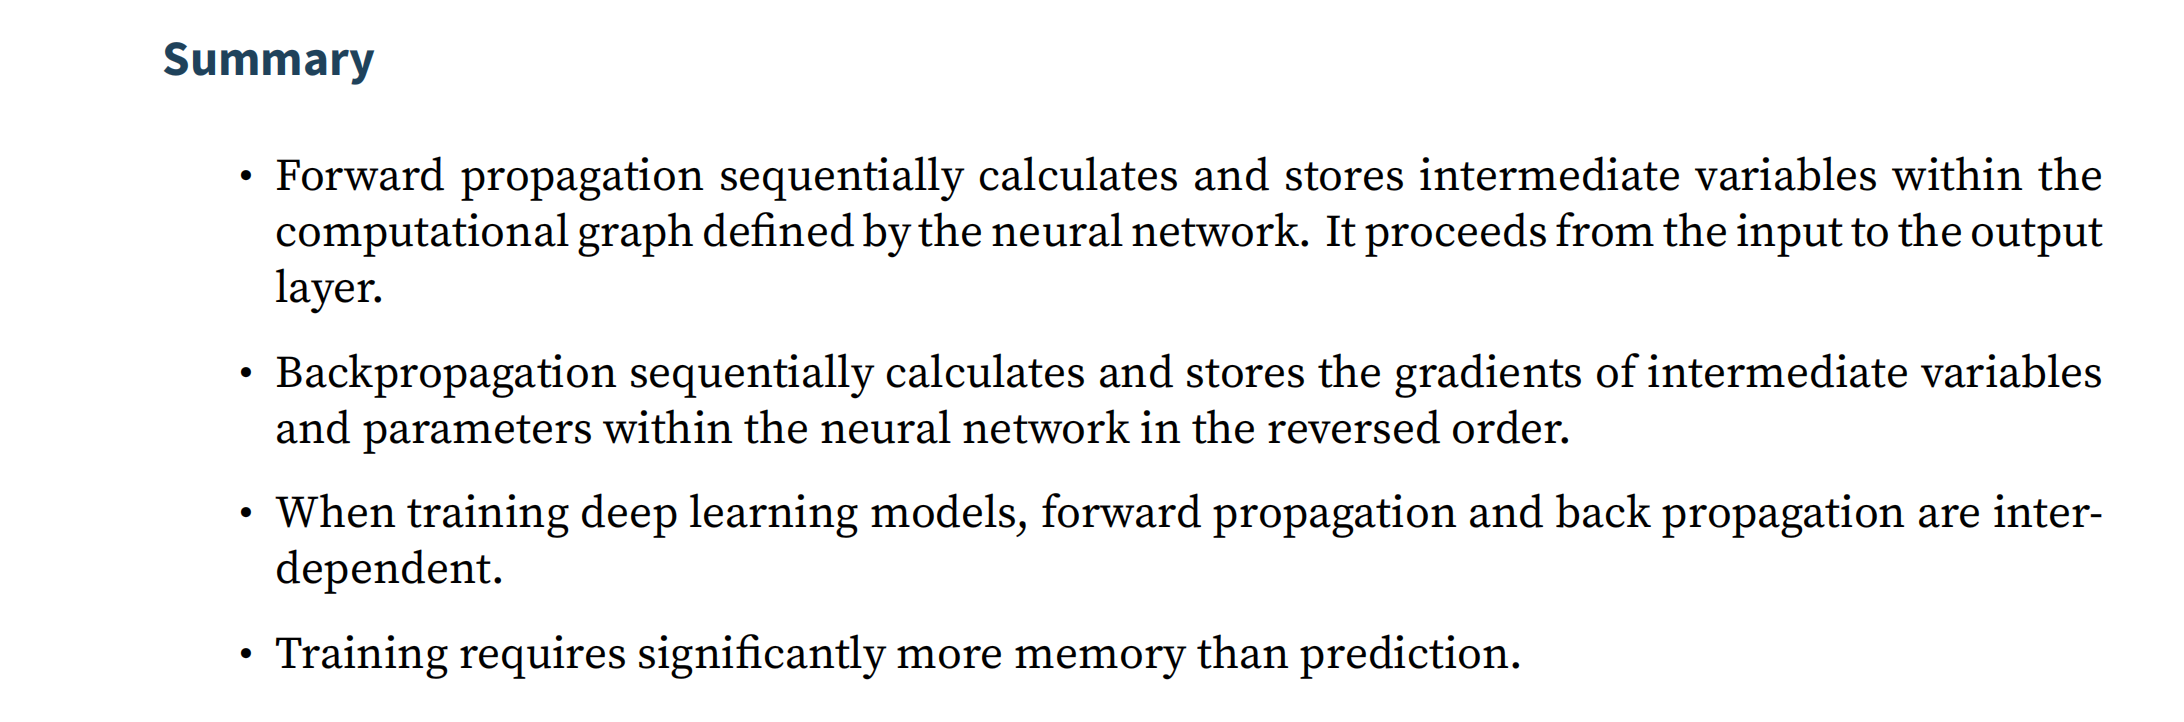

# Vanishing and Exploding Gradients

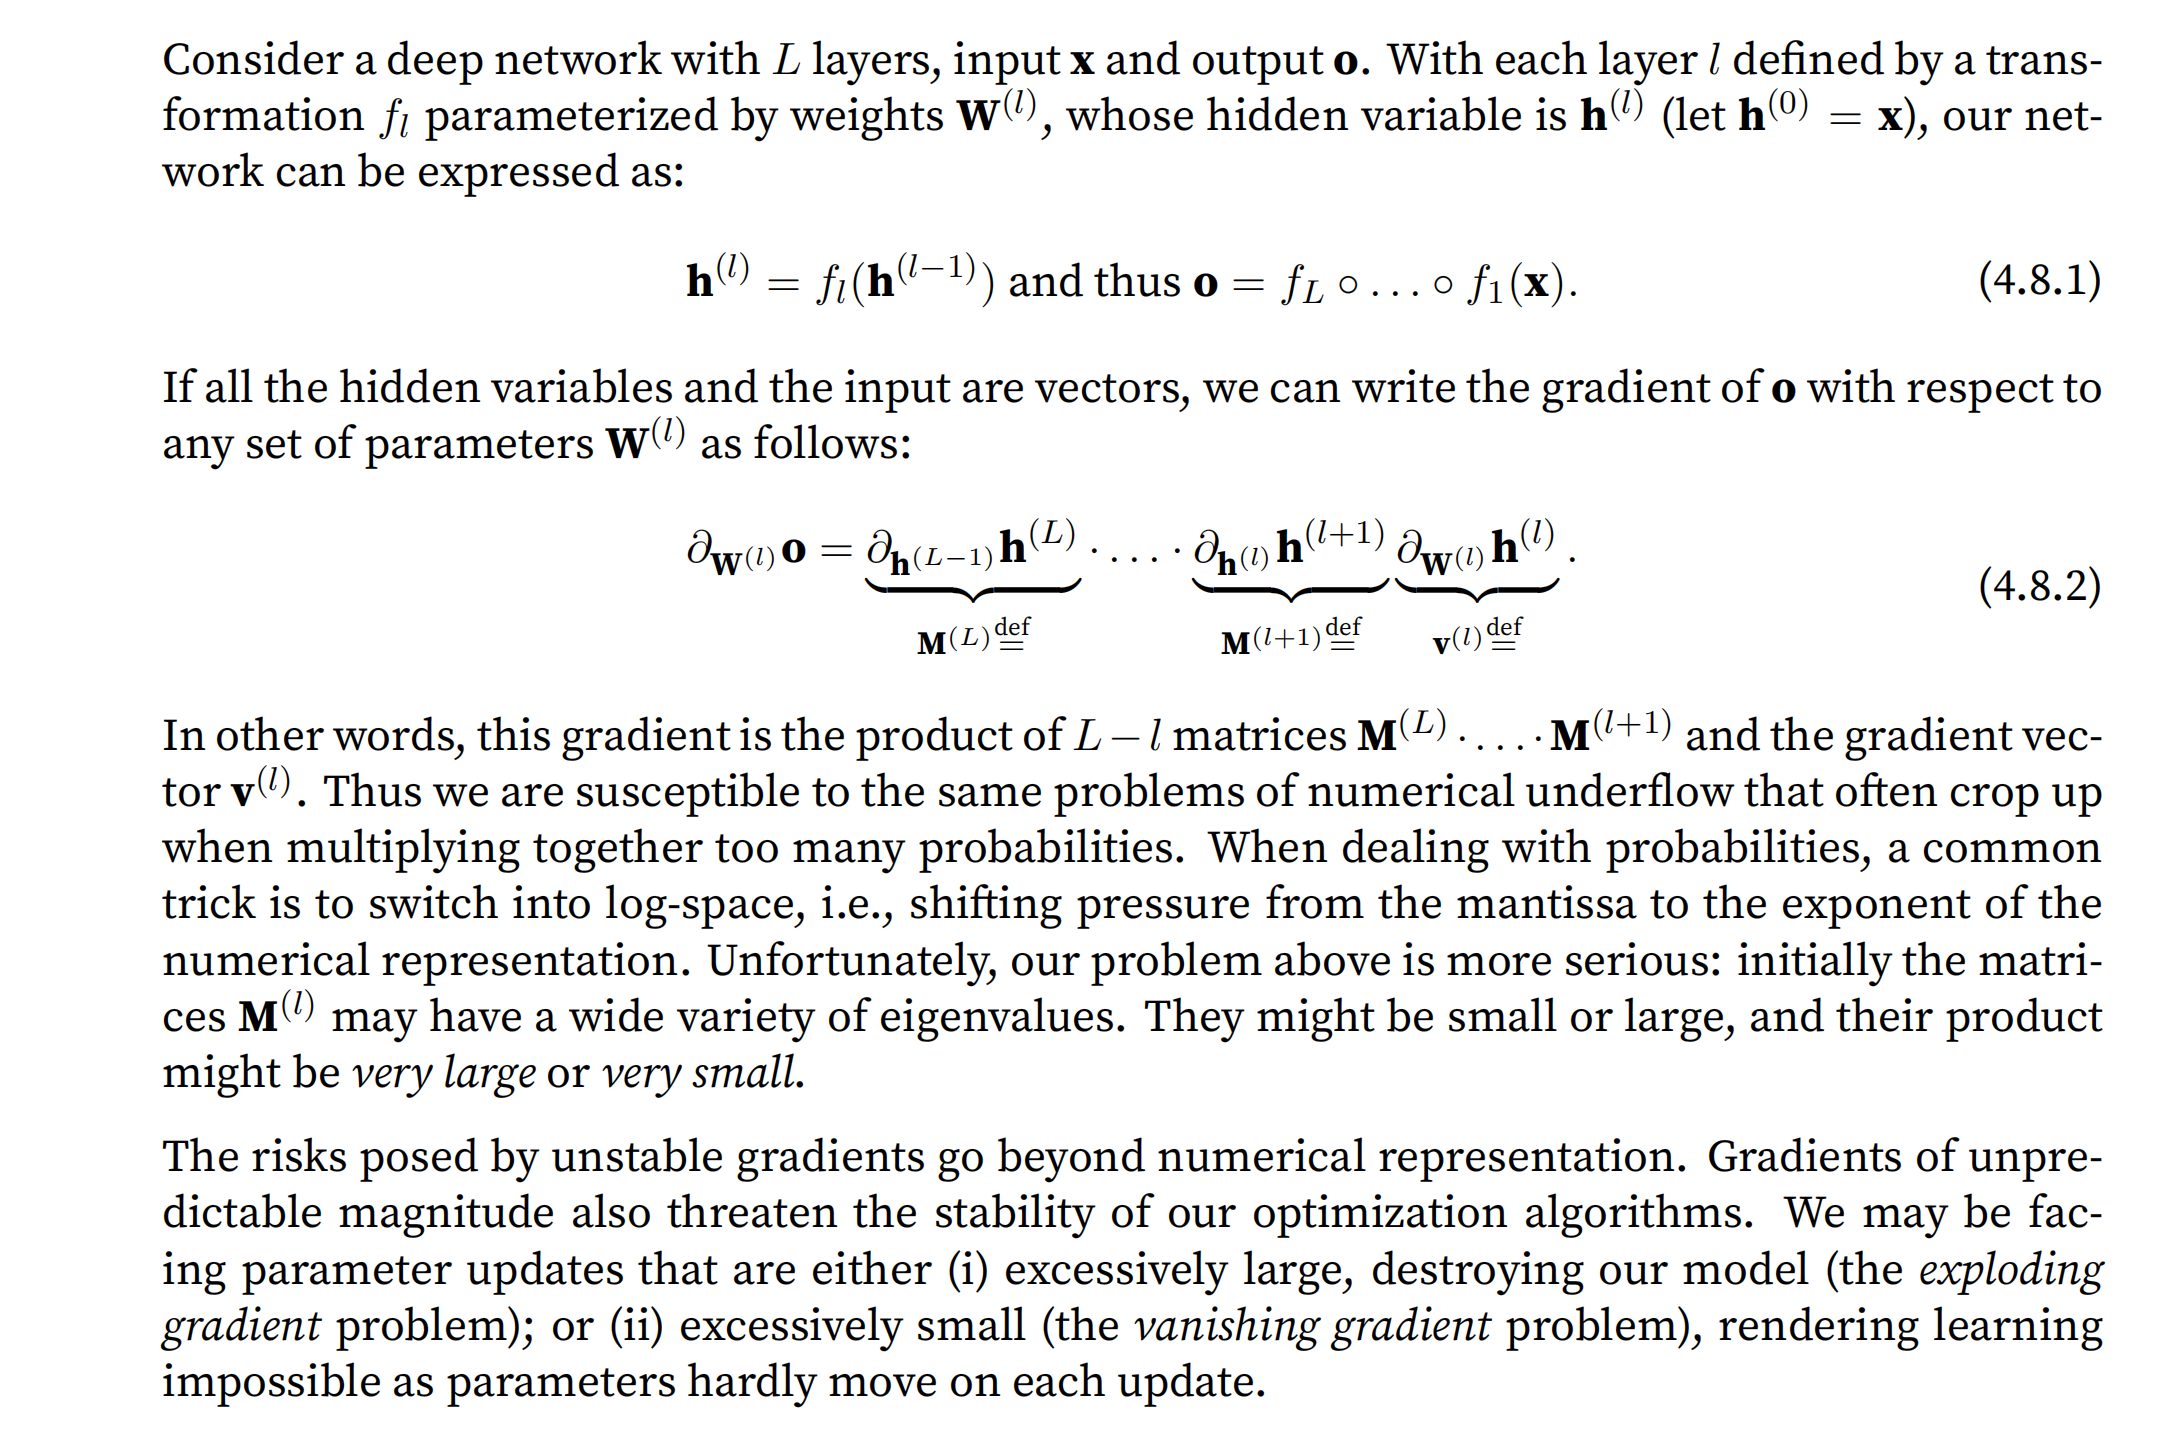


# Normalizing inputs

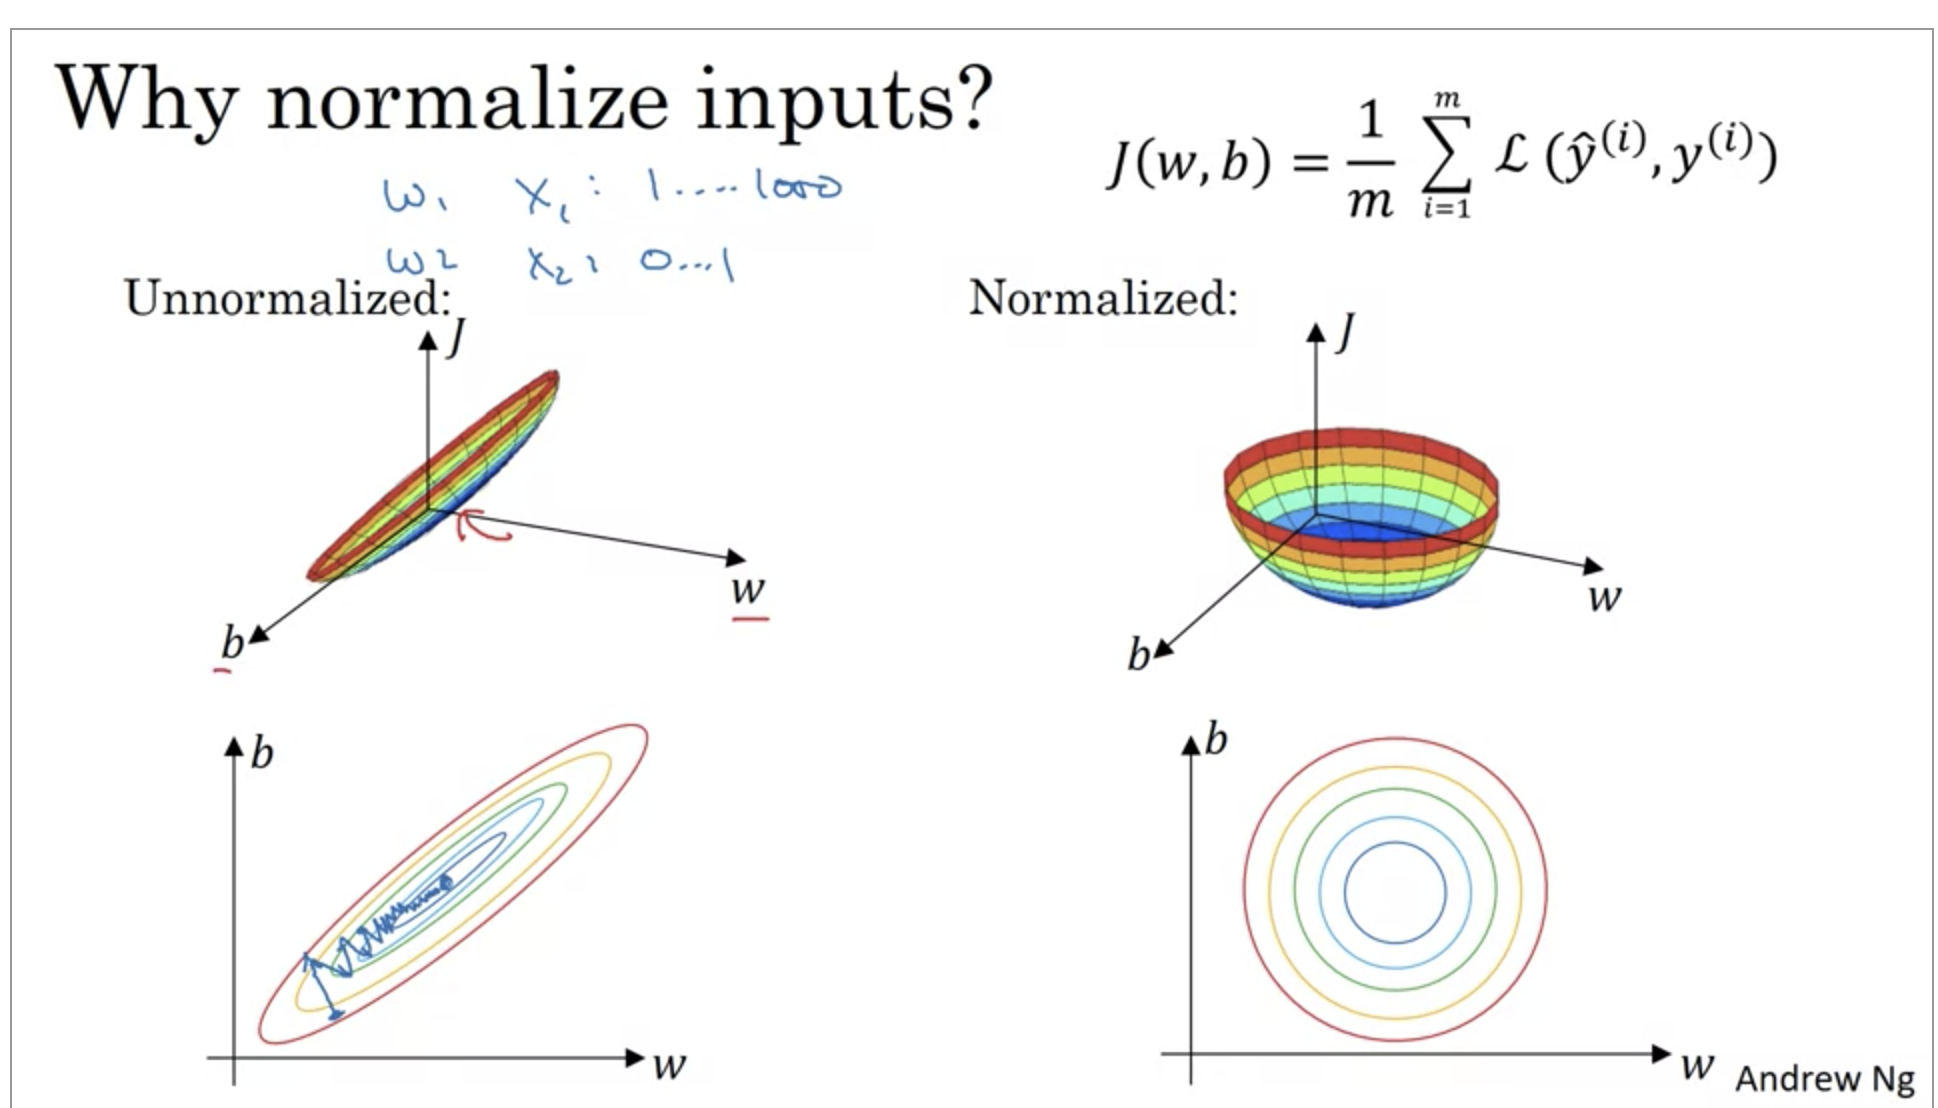

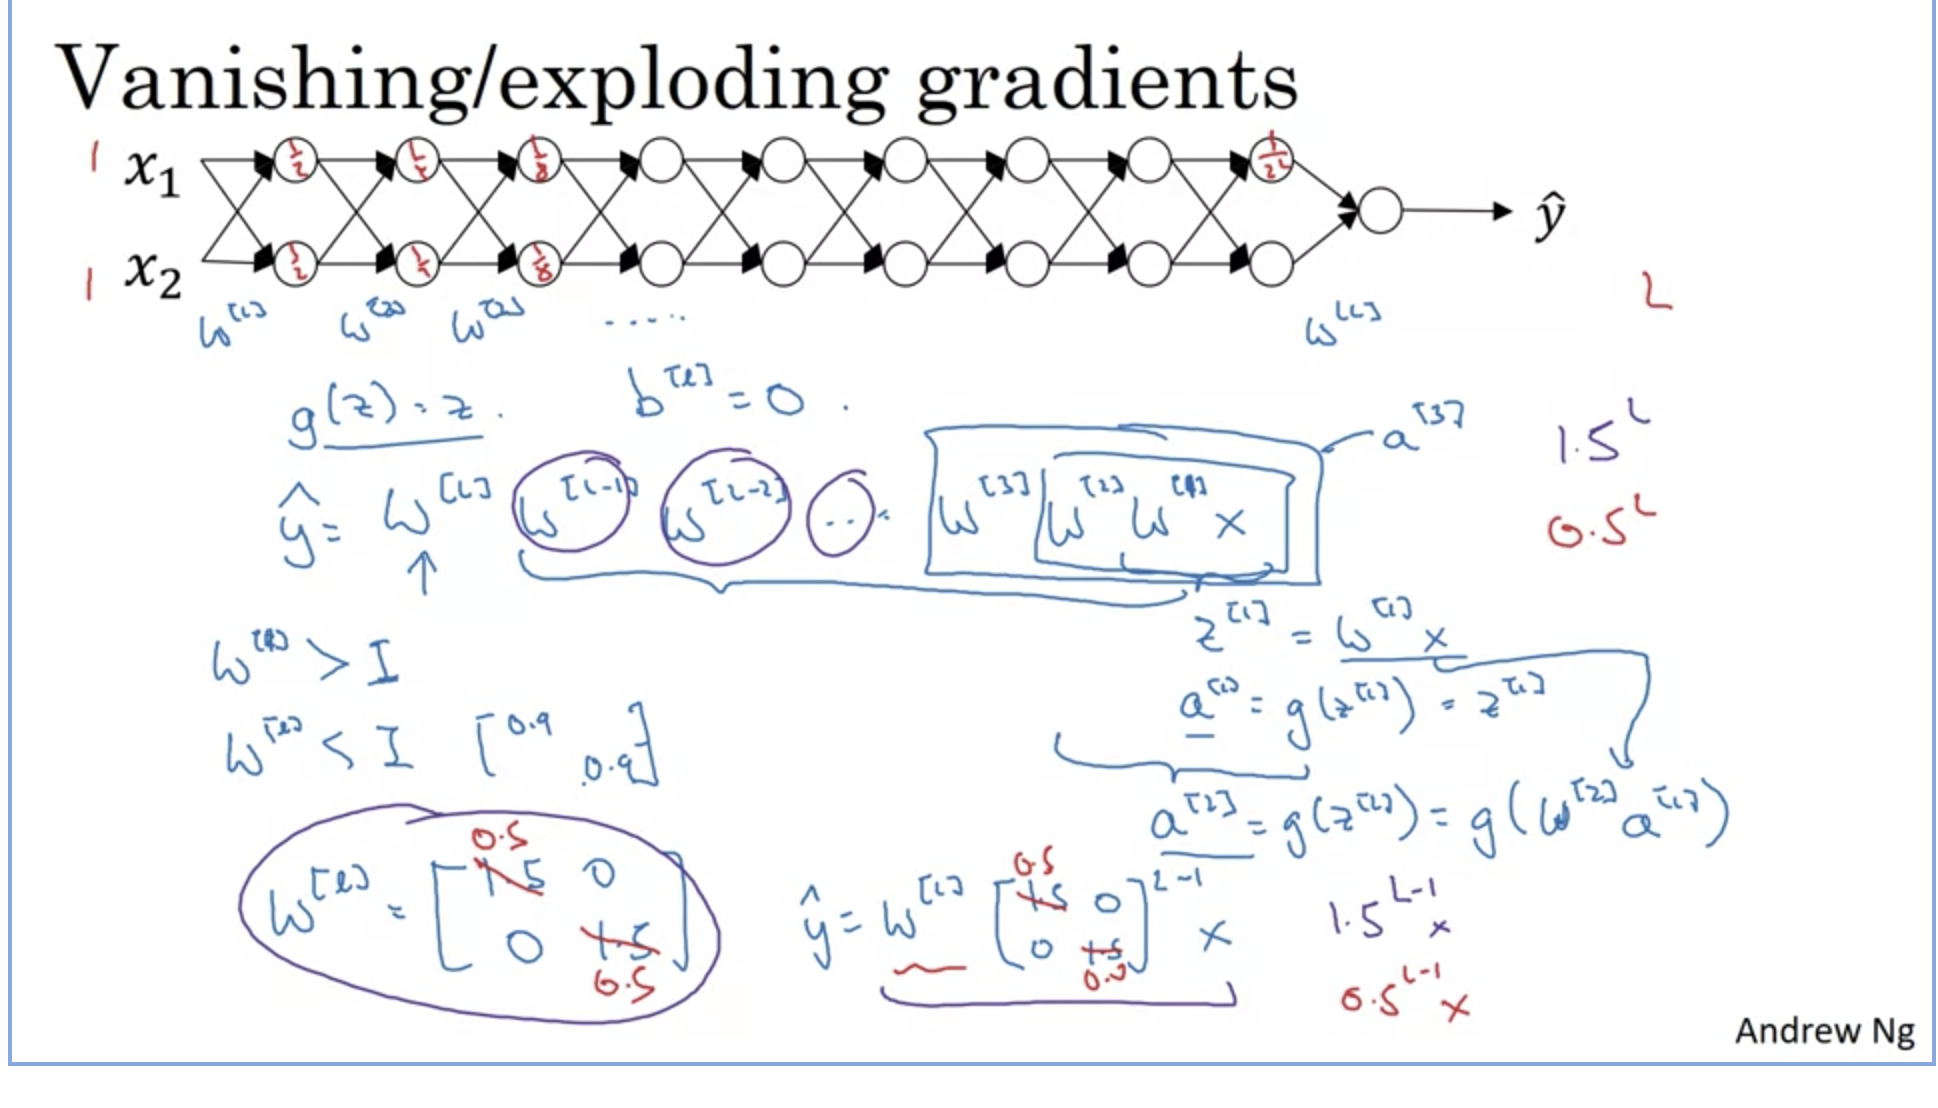

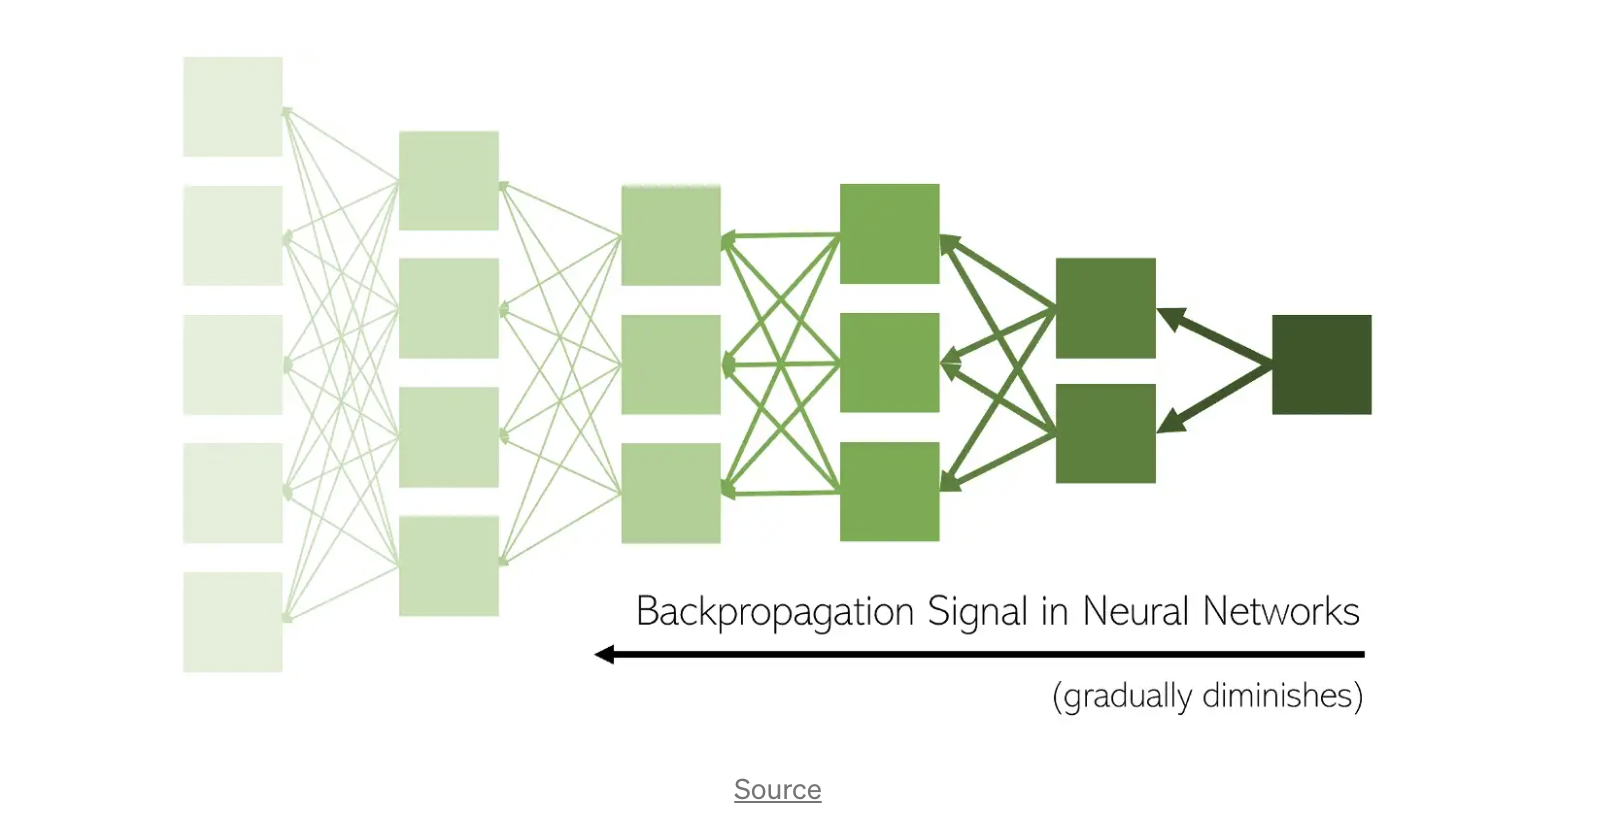

# Vanishing and Exploding Gradients

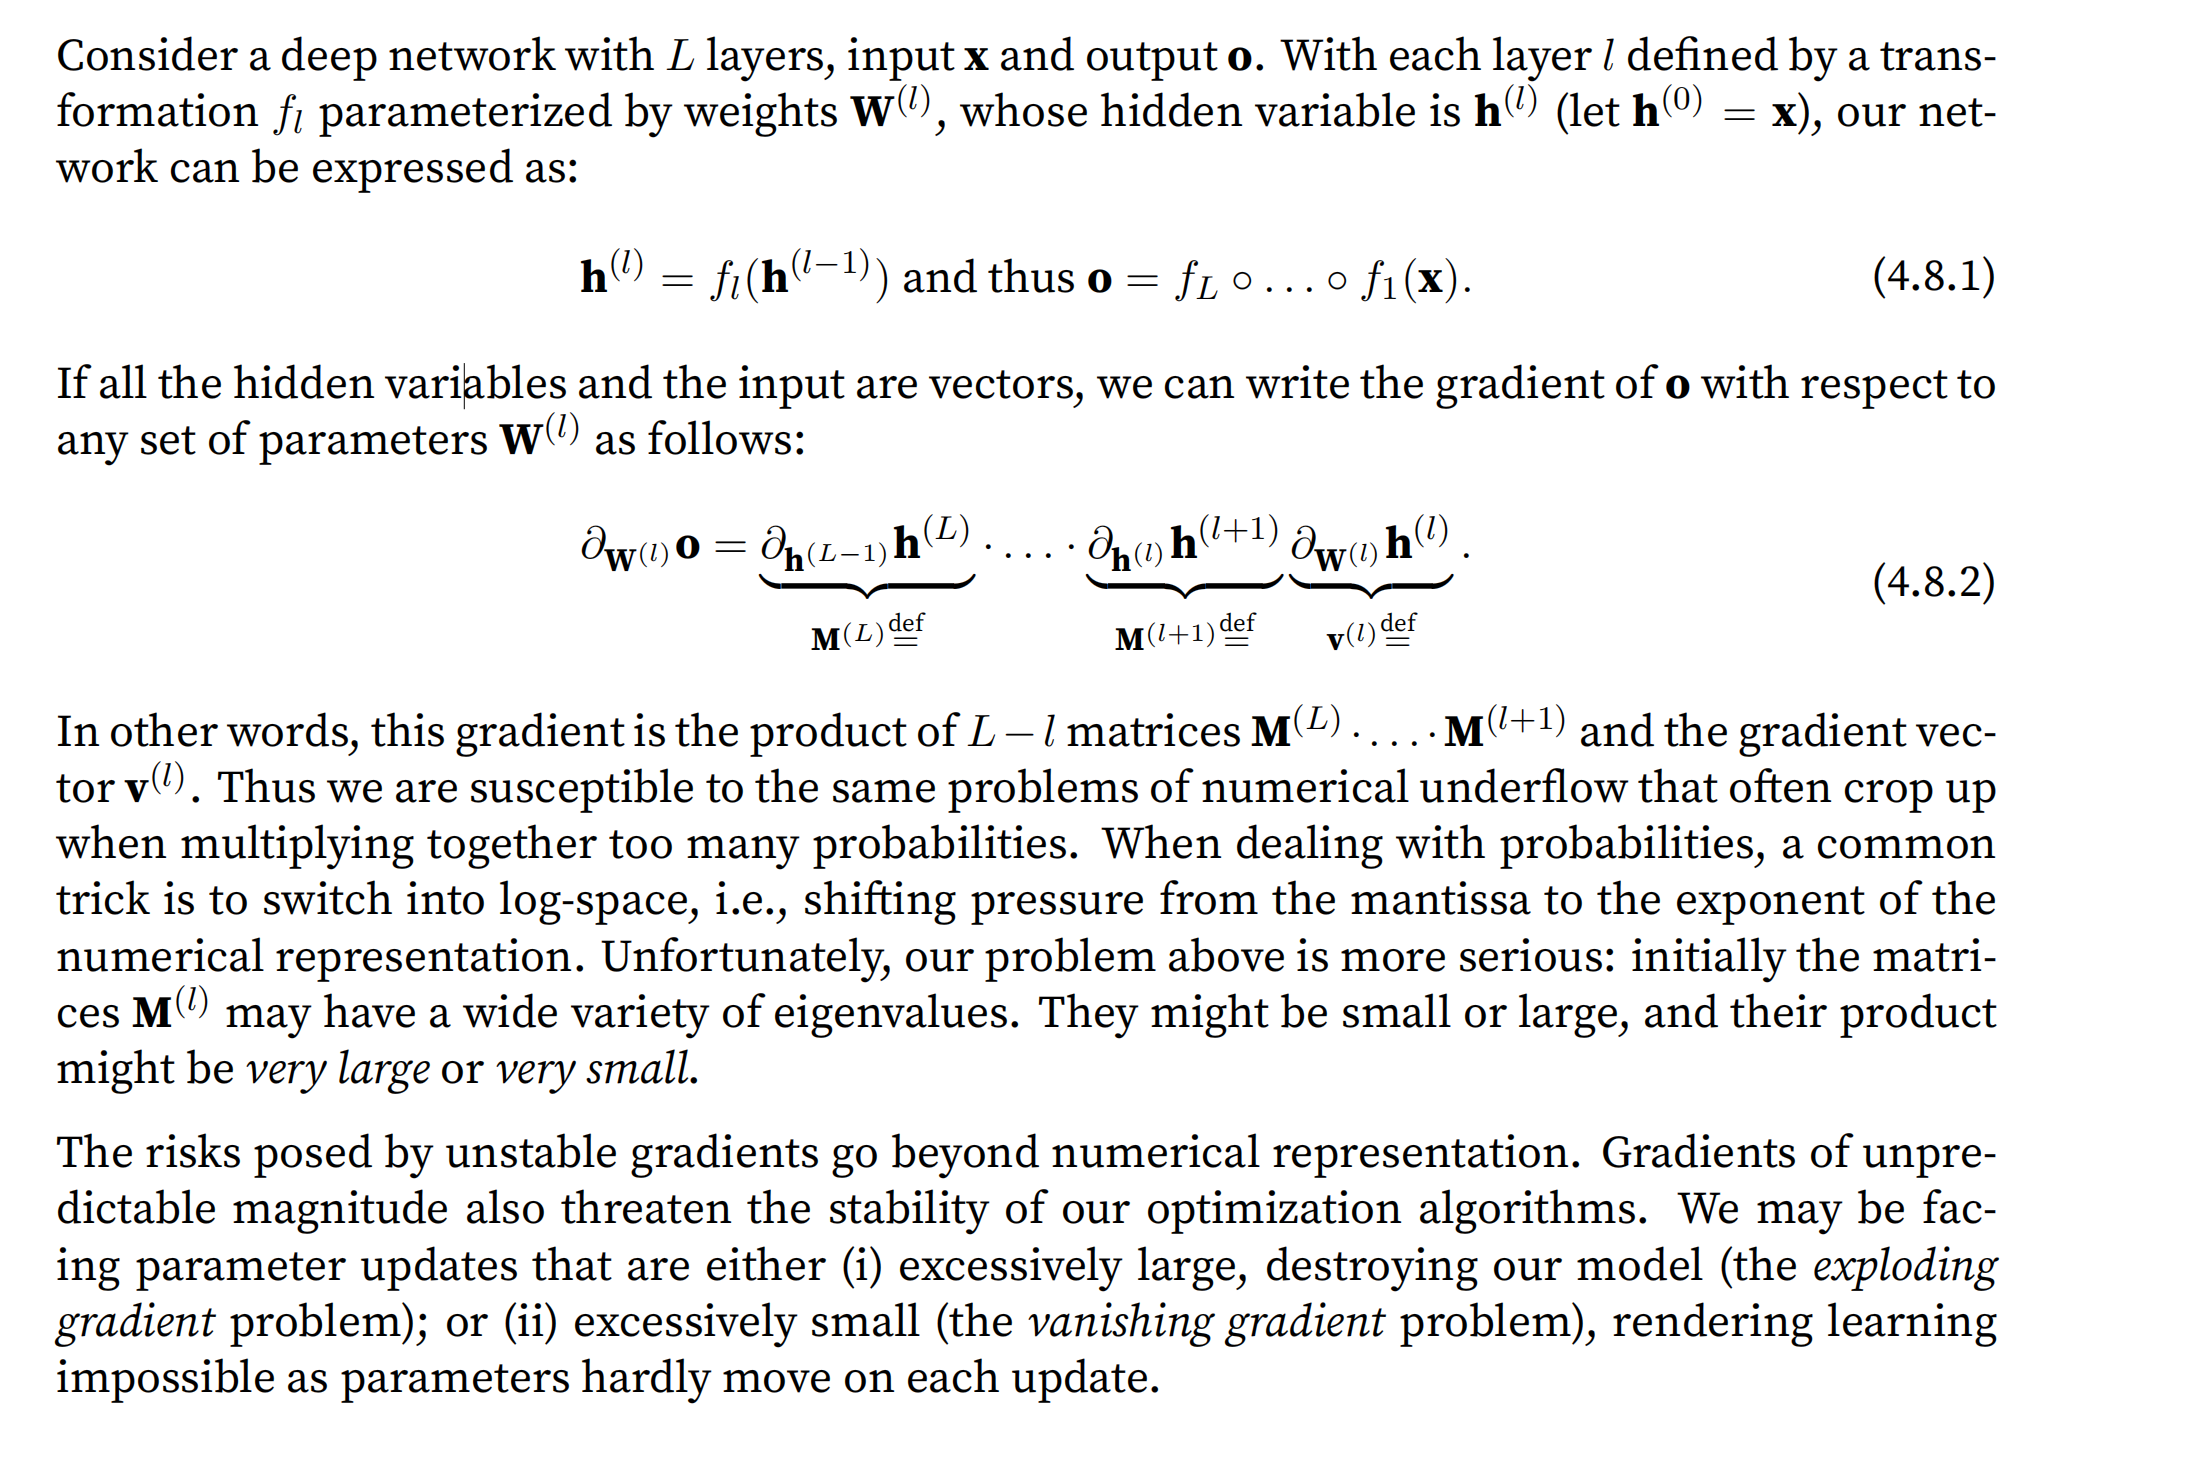

# Weight Initialization for Deep Networks

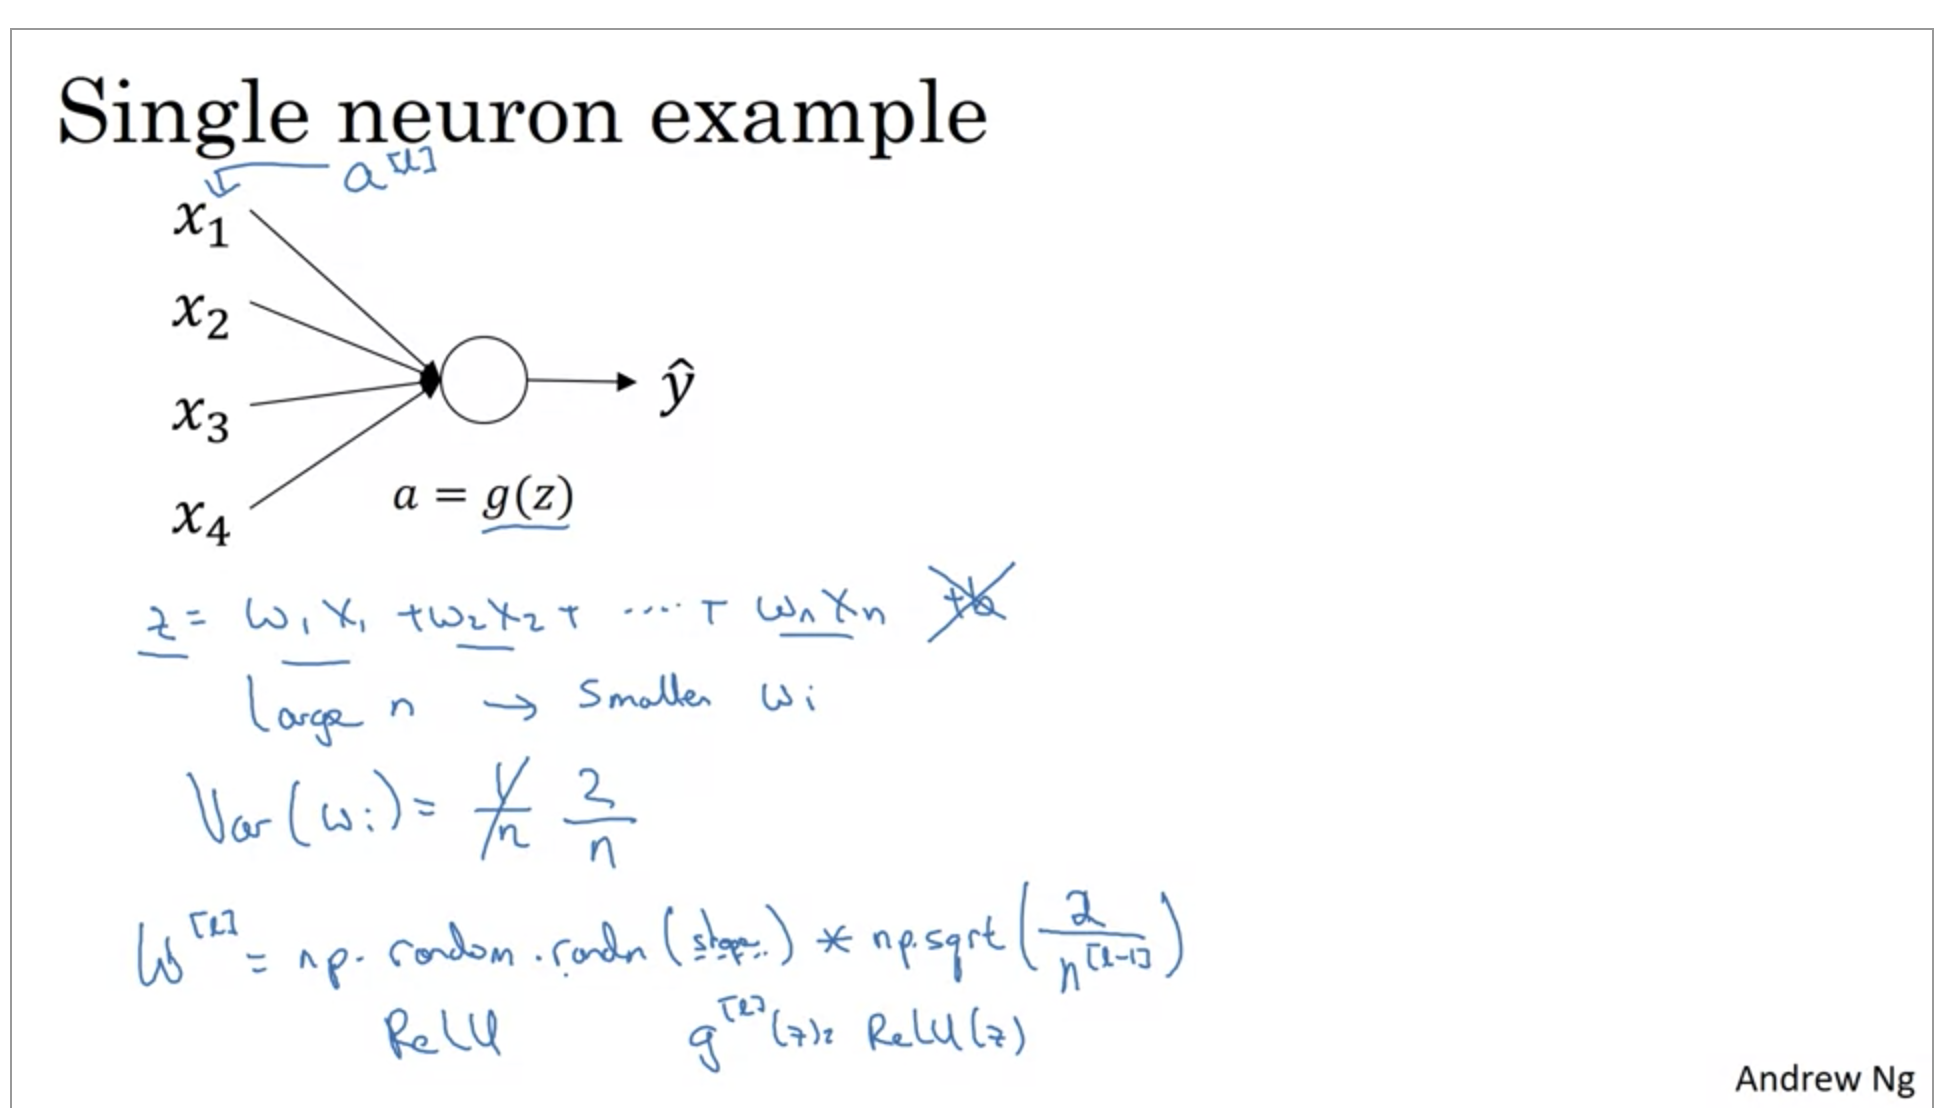

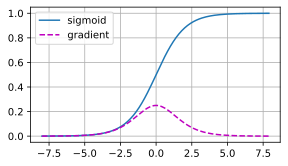

In [6]:
%matplotlib inline
from mxnet import autograd, np, npx
from d2l import mxnet as d2l

npx.set_np()

x = np.arange(-8.0, 8.0, 0.1)
x.attach_grad()
with autograd.record():
    y = npx.sigmoid(x)
y.backward()

d2l.plot(x, [y, x.grad], legend=['sigmoid', 'gradient'], figsize=(4.5, 2.5))

As you can see, the sigmoidʼs gradient vanishes both when its inputs are large and when they are
small. Moreover, when backpropagating through many layers, unless we are in the Goldilocks
zone, where the inputs to many of the sigmoids are close to zero, the gradients of the overall
product may vanish. When our network boasts many layers, unless we are careful, the gradient
will likely be cut off at some layer. Indeed, this problem used to plague deep network training.
Consequently, ReLUs, which are more stable (but less neurally plausible), have emerged as the
default choice for practitioners.

# Exploding Gradients

The opposite problem, when gradients explode, can be similarly vexing. To illustrate this a bit
better, we draw 100 Gaussian random matrices and multiply them with some initial matrix. For
the scale that we picked (the choice of the variance σ2 = 1), the matrix product explodes. When
this happens due to the initialization of a deep network, we have no chance of getting a gradient
descent optimizer to converge.

In [9]:
M = np.random.normal(size=(4, 4))
print('a single matrix', M)
for i in range(100):
    M = np.dot(M, np.random.normal(size=(4, 4)))
print('after multiplying 100 matrices', M)

a single matrix [[ 1.1630787   2.2122064   0.4838046   0.7740038 ]
 [ 0.29956347  1.0434403   0.15302546  1.1839255 ]
 [-1.1688148   1.8917114   1.5580711  -1.2347414 ]
 [-0.5459446  -1.771029   -2.3556297  -0.45138445]]
after multiplying 100 matrices [[ 2.7097446e+23 -7.9017520e+22 -2.8474315e+22 -3.7432803e+22]
 [ 5.7055883e+22 -1.6637787e+22 -5.9955943e+21 -7.8813140e+21]
 [-4.6633812e+23  1.3598651e+23  4.9003046e+22  6.4422011e+22]
 [-8.3223639e+22  2.4268410e+22  8.7450639e+21  1.1497428e+22]]
